In [1]:
import pandas as pd
import numpy as np

In [2]:
people_dict = {
    "weight": pd.Series([68, 83, 112], index=["alice", "bob", "charles"]),
    "birthyear": pd.Series([1984, 1985, 1992], index=["bob", "alice", "charles"], name="year"),
    "children": pd.Series([0, 3], index=["charles", "bob"]),
    "hobby": pd.Series(["Biking", "Dancing"], index=["alice", "bob"]),
}
people = pd.DataFrame(people_dict)
people

,birthyear,children,hobby,weight
alice,1985,NaN,Biking,68
bob,1984,3.0,Dancing,83
charles,1992,0.0,NaN,112


In [3]:
values = [
            [1985, np.nan, "Biking",   68],
            [1984, 3,      "Dancing",  83],
            [1992, 0,      np.nan,    112]
         ]
d3 = pd.DataFrame(
        values,
        columns=["birthyear", "children", "hobby", "weight"],
        index=["alice", "bob", "charles"]
     )
d3

,birthyear,children,hobby,weight
alice,1985,NaN,Biking,68
bob,1984,3.0,Dancing,83
charles,1992,0.0,NaN,112


In [4]:
people = pd.DataFrame({
    "birthyear": {"alice":1985, "bob": 1984, "charles": 1992},
    "hobby": {"alice":"Biking", "bob": "Dancing"},
    "weight": {"alice":68, "bob": 83, "charles": 112},
    "children": {"bob": 3, "charles": 0}
})
people

,birthyear,children,hobby,weight
alice,1985,NaN,Biking,68
bob,1984,3.0,Dancing,83
charles,1992,0.0,NaN,112


In [5]:
people[["birthyear", "hobby"]]

,birthyear,hobby
alice,1985,Biking
bob,1984,Dancing
charles,1992,NaN


In [6]:
people

,birthyear,children,hobby,weight
alice,1985,NaN,Biking,68
bob,1984,3.0,Dancing,83
charles,1992,0.0,NaN,112


In [7]:
people.loc["charles"]
people.iloc[2]

birthyear    1992
children        0
hobby         NaN
weight        112
Name: charles, dtype: object

In [8]:
people[people["birthyear"] < 1990]

,birthyear,children,hobby,weight
alice,1985,NaN,Biking,68
bob,1984,3.0,Dancing,83


In [9]:
people["age"] = 2016 - people["birthyear"]  
people["over 30"] = people["age"] > 30      
birthyears = people.pop("birthyear")
del people["children"]

people

,hobby,weight,age,over 30
alice,Biking,68,31,True
bob,Dancing,83,32,True
charles,NaN,112,24,False


In [10]:
birthyears

alice      1985
bob        1984
charles    1992
Name: birthyear, dtype: int64

In [11]:
people

,hobby,weight,age,over 30
alice,Biking,68,31,True
bob,Dancing,83,32,True
charles,NaN,112,24,False


In [12]:
people.insert(1, "height", [172, 181, 185])
people

,hobby,height,weight,age,over 30
alice,Biking,172,68,31,True
bob,Dancing,181,83,32,True
charles,NaN,185,112,24,False


In [13]:
people.assign(
    body_mass_index = people["weight"] / (people["height"] / 100) ** 2
)

,hobby,height,weight,age,over 30,body_mass_index
alice,Biking,172,68,31,True,22.985398
bob,Dancing,181,83,32,True,25.335002
charles,NaN,185,112,24,False,32.724617


In [14]:
people.eval("weight / (height/100) ** 2 > 25")

alice      False
bob         True
charles     True
dtype: bool

In [15]:
people.eval("body_mass_index = weight / (height/100) ** 2")
people

/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: eval expressions containing an assignment currentlydefault to operating inplace.
This will change in a future version of pandas, use inplace=True to avoid this warning.
  """Entry point for launching an IPython kernel.


,hobby,height,weight,age,over 30,body_mass_index
alice,Biking,172,68,31,True,22.985398
bob,Dancing,181,83,32,True,25.335002
charles,NaN,185,112,24,False,32.724617


In [16]:
overweight_threshold = 30
people.eval("overweight = body_mass_index > @overweight_threshold")
people

/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: eval expressions containing an assignment currentlydefault to operating inplace.
This will change in a future version of pandas, use inplace=True to avoid this warning.
  


,hobby,height,weight,age,over 30,body_mass_index,overweight
alice,Biking,172,68,31,True,22.985398,False
bob,Dancing,181,83,32,True,25.335002,False
charles,NaN,185,112,24,False,32.724617,True


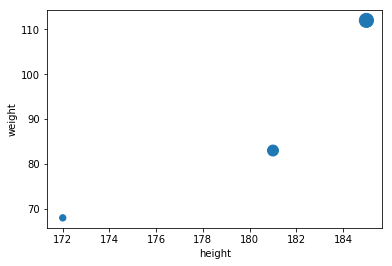

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt

people.plot(kind = "scatter", x = "height", y = "weight", s=[40, 120, 200])
plt.show()

In [18]:
############################
#Operations on DataFrames   #
#############################

In [19]:
grades_array = np.array([[8,8,9],[10,9,9],[4, 8, 2], [9, 10, 10]])
grades = pd.DataFrame(grades_array, columns=["sep", "oct", "nov"], index=["alice","bob","charles","darwin"])
grades

,sep,oct,nov
alice,8,8,9
bob,10,9,9
charles,4,8,2
darwin,9,10,10


In [20]:
bonus_array = np.array([[0,np.nan,2],[np.nan,1,0],[0, 1, 0], [3, 3, 0]])
bonus_points = pd.DataFrame(bonus_array, columns=["oct", "nov", "dec"], index=["bob","colin", "darwin", "charles"])
bonus_points

,oct,nov,dec
bob,0.0,NaN,2.0
colin,NaN,1.0,0.0
darwin,0.0,1.0,0.0
charles,3.0,3.0,0.0


In [21]:
grades + bonus_points


,dec,nov,oct,sep
alice,NaN,NaN,NaN,NaN
bob,NaN,NaN,9.0,NaN
charles,NaN,5.0,11.0,NaN
colin,NaN,NaN,NaN,NaN
darwin,NaN,11.0,10.0,NaN


In [22]:
(grades + bonus_points).fillna(0)


,dec,nov,oct,sep
alice,0.0,0.0,0.0,0.0
bob,0.0,0.0,9.0,0.0
charles,0.0,5.0,11.0,0.0
colin,0.0,0.0,0.0,0.0
darwin,0.0,11.0,10.0,0.0


In [23]:
fixed_bonus_points = bonus_points.fillna(0)
fixed_bonus_points.insert(0, "sep", 0)
fixed_bonus_points.loc["alice"] = 0
grades + fixed_bonus_points

,dec,nov,oct,sep
alice,NaN,9.0,8.0,8.0
bob,NaN,9.0,9.0,10.0
charles,NaN,5.0,11.0,4.0
colin,NaN,NaN,NaN,NaN
darwin,NaN,11.0,10.0,9.0


In [24]:
bonus_points

,oct,nov,dec
bob,0.0,NaN,2.0
colin,NaN,1.0,0.0
darwin,0.0,1.0,0.0
charles,3.0,3.0,0.0


In [25]:
better_bonus_points = bonus_points.copy()
better_bonus_points.insert(0, "sep", 0)
better_bonus_points.loc["alice"] = 0
better_bonus_points = better_bonus_points.interpolate(axis=1)
better_bonus_points

,sep,oct,nov,dec
bob,0.0,0.0,1.0,2.0
colin,0.0,0.5,1.0,0.0
darwin,0.0,0.0,1.0,0.0
charles,0.0,3.0,3.0,0.0
alice,0.0,0.0,0.0,0.0


In [26]:
grades["dec"] = np.nan
final_grades = grades + better_bonus_points
final_grades

,sep,oct,nov,dec
alice,8.0,8.0,9.0,NaN
bob,10.0,9.0,10.0,NaN
charles,4.0,11.0,5.0,NaN
colin,NaN,NaN,NaN,NaN
darwin,9.0,10.0,11.0,NaN


In [27]:
final_grades_clean = final_grades.dropna(how="all")
final_grades_clean

,sep,oct,nov,dec
alice,8.0,8.0,9.0,NaN
bob,10.0,9.0,10.0,NaN
charles,4.0,11.0,5.0,NaN
darwin,9.0,10.0,11.0,NaN


In [28]:
final_grades_clean = final_grades_clean.dropna(axis=1, how="all")
final_grades_clean

,sep,oct,nov
alice,8.0,8.0,9.0
bob,10.0,9.0,10.0
charles,4.0,11.0,5.0
darwin,9.0,10.0,11.0


In [29]:
###########################
#Aggregating with groupby #
###########################

In [30]:
final_grades["hobby"] = ["Biking", "Dancing", np.nan, "Dancing", "Biking"]
final_grades

,sep,oct,nov,dec,hobby
alice,8.0,8.0,9.0,NaN,Biking
bob,10.0,9.0,10.0,NaN,Dancing
charles,4.0,11.0,5.0,NaN,NaN
colin,NaN,NaN,NaN,NaN,Dancing
darwin,9.0,10.0,11.0,NaN,Biking


In [31]:
grouped_grades = final_grades.groupby("hobby")
grouped_grades
grouped_grades.mean()

,sep,oct,nov,dec
hobby,,,,
Biking,8.5,9.0,10.0,NaN
Dancing,10.0,9.0,10.0,NaN


In [32]:
###############
#Pivot tables #
###############

In [33]:
more_grades = final_grades_clean.stack().reset_index()
more_grades.columns = ["name", "month", "grade"]
more_grades["bonus"] = [np.nan, np.nan, np.nan, 0, np.nan, 2, 3, 3, 0, 0, 1, 0]
more_grades

,name,month,grade,bonus
0,alice,sep,8.0,NaN
1,alice,oct,8.0,NaN
2,alice,nov,9.0,NaN
3,bob,sep,10.0,0.0
4,bob,oct,9.0,NaN
5,bob,nov,10.0,2.0
6,charles,sep,4.0,3.0
7,charles,oct,11.0,3.0
8,charles,nov,5.0,0.0
9,darwin,sep,9.0,0.0


In [34]:
pd.pivot_table(more_grades, index="name")

#By default, pivot_table computes the mean of each numeric column

,bonus,grade
name,,
alice,NaN,8.333333
bob,1.000000,9.666667
charles,2.000000,6.666667
darwin,0.333333,10.000000


In [35]:
pd.pivot_table(more_grades, index="name", values=["grade","bonus"], aggfunc=np.max)


,bonus,grade
name,,
alice,NaN,9.0
bob,2.0,10.0
charles,3.0,11.0
darwin,1.0,11.0


In [36]:
pd.pivot_table(more_grades, index="name", values="grade", columns="month", margins=True)


month,nov,oct,sep,All
name,,,,
alice,9.00,8.0,8.00,8.333333
bob,10.00,9.0,10.00,9.666667
charles,5.00,11.0,4.00,6.666667
darwin,11.00,10.0,9.00,10.000000
All,8.75,9.5,7.75,8.666667


In [37]:
pd.pivot_table(more_grades, index=("name", "month"), margins=True)


bonus  grade
name    month              
alice   nov      NaN   9.00
        oct      NaN   8.00
        sep      NaN   8.00
bob     nov    2.000  10.00
        oct      NaN   9.00
        sep    0.000  10.00
charles nov    0.000   5.00
        oct    3.000  11.00
        sep    3.000   4.00
darwin  nov    0.000  11.00
        oct    1.000  10.00
        sep    0.000   9.00
All            1.125   8.75

In [38]:
###############
#Drawing text #
###############

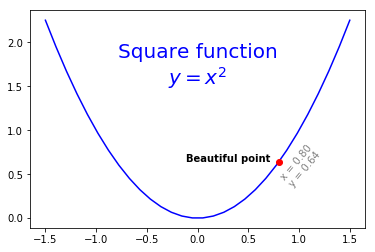

In [39]:
x = np.linspace(-1.5, 1.5, 30)
px = 0.8
py = px**2

plt.plot(x, x**2, "b-", px, py, "ro")

plt.text(0, 1.5, "Square function\n$y = x^2$", fontsize=20, color='blue', horizontalalignment="center")
plt.text(px - 0.08, py, "Beautiful point", ha="right", weight="heavy")
plt.text(px, py, "x = %0.2f\ny = %0.2f"%(px, py), rotation=50, color='gray')

plt.show()

In [40]:
x

array([-1.5       , -1.39655172, -1.29310345, -1.18965517, -1.0862069 ,
       -0.98275862, -0.87931034, -0.77586207, -0.67241379, -0.56896552,
       -0.46551724, -0.36206897, -0.25862069, -0.15517241, -0.05172414,
        0.05172414,  0.15517241,  0.25862069,  0.36206897,  0.46551724,
        0.56896552,  0.67241379,  0.77586207,  0.87931034,  0.98275862,
        1.0862069 ,  1.18965517,  1.29310345,  1.39655172,  1.5       ])

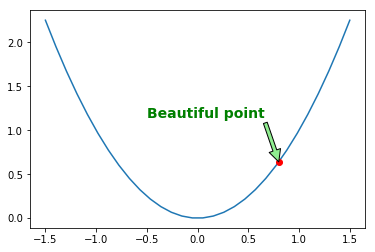

In [41]:
plt.plot(x, x**2, px, py, "ro")
plt.annotate("Beautiful point", xy=(px, py), xytext=(px-1.3,py+0.5),
                           color="green", weight="heavy", fontsize=14,
                           arrowprops={"facecolor": "lightgreen"})
plt.show()

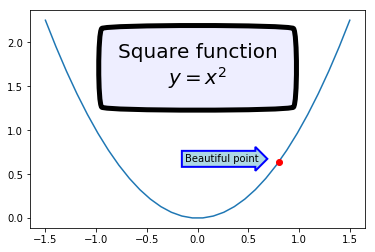

In [42]:
plt.plot(x, x**2, px, py, "ro")

bbox_props = dict(boxstyle="rarrow,pad=0.3", ec="b", lw=2, fc="lightblue")
plt.text(px-0.2, py, "Beautiful point", bbox=bbox_props, ha="right")

bbox_props = dict(boxstyle="round4,pad=1,rounding_size=0.2", ec="black", fc="#EEEEFF", lw=5)
plt.text(0, 1.5, "Square function\n$y = x^2$", fontsize=20, color='black', ha="center", bbox=bbox_props)

plt.show()

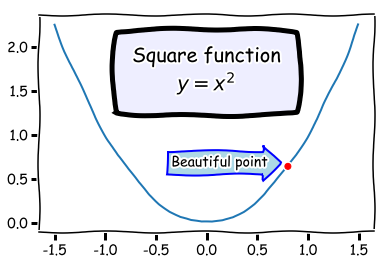

In [43]:
with plt.xkcd():
    plt.plot(x, x**2, px, py, "ro")

    bbox_props = dict(boxstyle="rarrow,pad=0.3", ec="b", lw=2, fc="lightblue")
    plt.text(px-0.2, py, "Beautiful point", bbox=bbox_props, ha="right")

    bbox_props = dict(boxstyle="round4,pad=1,rounding_size=0.2", ec="black", fc="#EEEEFF", lw=5)
    plt.text(0, 1.5, "Square function\n$y = x^2$", fontsize=20, color='black', ha="center", bbox=bbox_props)

    plt.show()

In [44]:
################
#Scatter plot  #
################

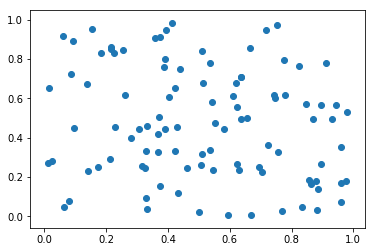

In [45]:
from numpy.random import rand
x, y = rand(2, 100)
plt.scatter(x, y)
plt.show()

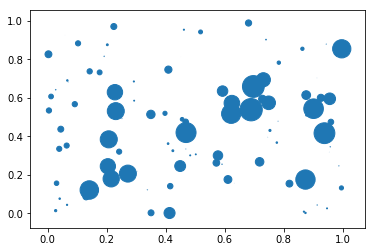

In [46]:
x, y, scale = rand(3, 100)
scale = 500 * scale ** 5
plt.scatter(x, y, s=scale)
plt.show()

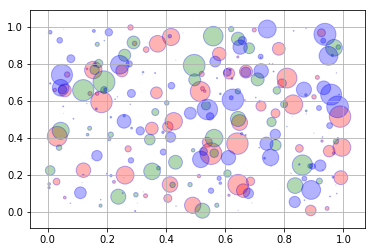

In [47]:
for color in ['red', 'green', 'blue']:
    n = 100
    x, y = rand(2, n)
    scale = 500.0 * rand(n) ** 5
    plt.scatter(x, y, s=scale, c=color, alpha=0.3, edgecolors='blue')

plt.grid(True)

plt.show()

In [48]:
##########
#Legends #
##########

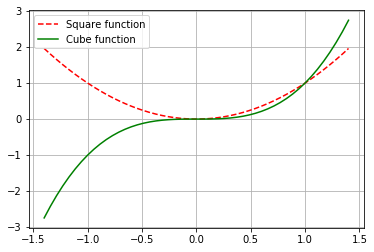

In [49]:
x = np.linspace(-1.4, 1.4, 50)
plt.plot(x, x**2, "r--", label="Square function")
plt.plot(x, x**3, "g-", label="Cube function")
plt.legend(loc="best")
plt.grid(True)
plt.show()